In [ ]:
#!pip install transformers
#!pip install sentence-transformers 

#import torch
#from sentence_transformers.util import cos_sim as cs
#from transformers import DPRQuestionEncoderTokenizer as dqt
#from transformers import DPRQuestionEncoder as dqe
#from transformers import DPRContextEncoderTokenizer as dct
#from transformers import DPRContextEncoder as dce

In [ ]:
from transformers import CLIPProcessor, CLIPModel

In [ ]:
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')

processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

Downloading:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/577M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/842k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


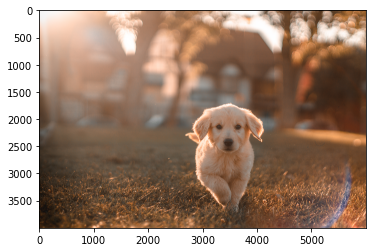

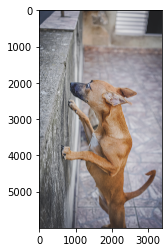

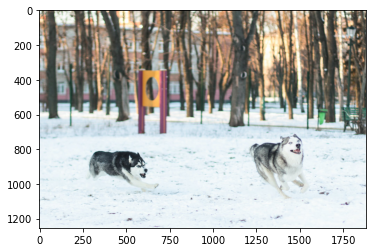

In [ ]:
from PIL import Image 
import requests
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

urls =[ 
       "https://images.unsplash.com/photo-1576201836106-db1758fd1c97",
       "https://images.pexels.com/photos/5046690/pexels-photo-5046690.jpeg",
       "https://images.pexels.com/photos/3715581/pexels-photo-3715581.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"
  
]

images = [Image.open(requests.get(url, stream=True).raw) for url in urls]

for image in images:
  plt.show(plt.imshow(np.asarray(image)))

In [ ]:
captions =[
           "two dogs running",
           "a dog eating treat",
           "a dog behind a wall",
           "a christmas bogeyman dog",
           'a dog is running'
]

In [ ]:
inputs = processor(
    text=captions, images =images, return_tensors='pt', padding=True
)

In [ ]:
outputs = model(**inputs)
outputs

CLIPOutput([('logits_per_image',
             tensor([[26.4777, 25.1613, 26.2709, 21.2792, 28.3417],
                     [22.4314, 26.7163, 29.2890, 22.2191, 24.7002],
                     [28.4033, 22.7392, 21.9209, 22.4323, 26.3327]],
                    grad_fn=<PermuteBackward0>)),
            ('logits_per_text', tensor([[26.4777, 22.4314, 28.4033],
                     [25.1613, 26.7163, 22.7392],
                     [26.2709, 29.2890, 21.9209],
                     [21.2792, 22.2191, 22.4323],
                     [28.3417, 24.7002, 26.3327]], grad_fn=<MulBackward0>)),
            ('text_embeds',
             tensor([[ 0.0117, -0.0137, -0.0734,  ..., -0.0049,  0.0094, -0.0250],
                     [-0.0087, -0.0164, -0.0240,  ..., -0.0148, -0.0330,  0.0064],
                     [ 0.0095, -0.0110, -0.0226,  ..., -0.0405, -0.0106,  0.0416],
                     [ 0.0219, -0.0085, -0.0143,  ...,  0.0090, -0.0100,  0.0068],
                     [ 0.0079, -0.0152, -0.0353,  ..., -

In [ ]:
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

a dog is running


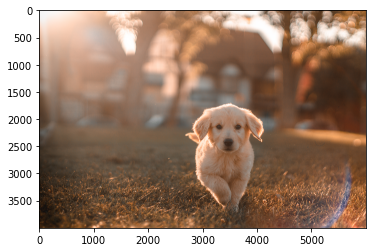

a dog behind a wall


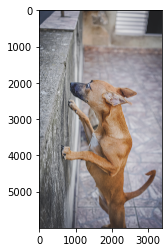

two dogs running


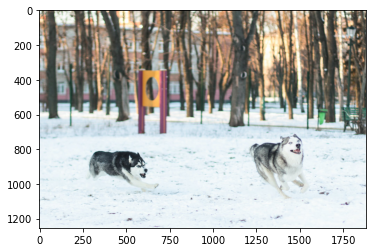

In [ ]:
probs = outputs.logits_per_image.argmax(dim=1)
for i, image in enumerate(images):
  argmax= probs[i].item()
  print(captions[argmax])
  plt.show(plt.imshow(np.asarray(image)))

In [ ]:
#we could do the same thing to predic

outputs.text_embeds.shape,outputs.image_embeds.shape

(torch.Size([5, 512]), torch.Size([3, 512]))

In [ ]:
outputs_embedding = outputs.image_embeds
Outputs_text_embedding = outputs.text_embeds[0]

similarity = cs(outputs_embedding, Outputs_text_embedding)
similarity

tensor([[0.2648],
        [0.2243],
        [0.2840]], grad_fn=<MmBackward0>)

In [ ]:
pred = similarity.argmax().item()
pred

2

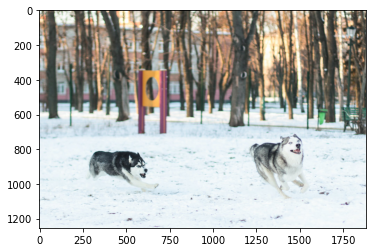

In [ ]:
plt.show(plt.imshow(np.asarray(images[pred])))